# Table of Contents (Task 4.10)

### 1. Import Liberaries and Dataframe

### 2.Consider of Personally Identifiable Information (PII)

### 3. Regional Analysis

### 4. Customer Flag

### 5. Create Customers profile and Department

## 1 import Libraries and Dataframe

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#import path of dataframe
path = r"C:\Users\bhimc\Documents\Instacart Basket Analysis (Career Foundry Rekha)"

In [3]:
path

'C:\\Users\\bhimc\\Documents\\Instacart Basket Analysis (Career Foundry Rekha)'

In [4]:
# Import insta_grocery dataframe
insta_grocery = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [5]:
insta_grocery.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Last Name,Gender,State,Age,date_joined,number_of_dependants,marital_status,income,_merge
0,2539329,1,1.0,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2.0,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3.0,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4.0,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5.0,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


## 2. Personally Identifiable Information (PII) data

### This Insta_grocery dataframe has contains PII data eg: name, Gender, State,marital_status, depandents, incomes. However, the dataframe doesn't include any sensitive data such as their living address, phone number, email etc. that could have their personal identity tracked. No extra measures are needed for this. 

## 3. Regional Analysis

### " Create a regional segmentation of the data, and create a “Region” column based on the “State” column and Determine whether there’s a difference in spending habits between the different U.S. regions."

#### Create a Region - wise State base on wikipedia link below
"https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States"

In [7]:
# create a column 'region' based on the 'State' column for "Northeast" region

insta_grocery.loc[(insta_grocery['State']=='Maine') | 
              (insta_grocery['State']=='New Hampshire')|
              (insta_grocery['State']=='Vermont') |
              (insta_grocery['State']=='Massachusetts') |
              (insta_grocery['State']=='Rhode Island') |
              (insta_grocery['State']=='Connecticut')|
              (insta_grocery['State']=='New York')|
              (insta_grocery['State']=='Pennsylvania')|
              (insta_grocery['State']=='New Jersey') ,
              'region']='Northeast'

In [8]:
# create a column 'region' based on the 'State' column for "Midwest" region

insta_grocery.loc[(insta_grocery['State']=='Wisconsin') | 
              (insta_grocery['State']=='Michigan')|
              (insta_grocery['State']=='Illinois') |
              (insta_grocery['State']=='Indiana') |
              (insta_grocery['State']=='Ohio') |
              (insta_grocery['State']=='North Dakota')|
              (insta_grocery['State']=='South Dakota')|
              (insta_grocery['State']=='Nebraska')|
              (insta_grocery['State']=='Kansas')|
              (insta_grocery['State']=='Minnesota')|
              (insta_grocery['State']=='Iowa')|
              (insta_grocery['State']=='Missouri') ,
              'region']='Midwest'

In [9]:
# create a column 'region' based on the 'State' column for "South" region

insta_grocery.loc[(insta_grocery['State']=='Delaware')|
              (insta_grocery['State']=='Maryland')|
              (insta_grocery['State']=='District of Columbia')|
              (insta_grocery['State']=='Virginia')|
              (insta_grocery['State']=='West Virginia')|
              (insta_grocery['State']=='North Carolina')|
              (insta_grocery['State']=='South Carolina')|
              (insta_grocery['State']=='Georgia')|
              (insta_grocery['State']=='Florida')|
              (insta_grocery['State']=='Kentucky')|
              (insta_grocery['State']=='Tennessee')|
              (insta_grocery['State']=='Mississippi')|
              (insta_grocery['State']=='Alabama')|
              (insta_grocery['State']=='Oklahoma')|
              (insta_grocery['State']=='Texas')|
              (insta_grocery['State']=='Arkansas')|
              (insta_grocery['State']=='Louisiana'),
              'region']='South'

In [10]:
# create a column 'region' based on the 'State' column for West region

insta_grocery.loc[(insta_grocery['State']=='Idaho')|
              (insta_grocery['State']=='Montana')|
              (insta_grocery['State']=='Wyoming')|
              (insta_grocery['State']=='Nevada')|
              (insta_grocery['State']=='Utah')|
              (insta_grocery['State']=='Colorado')|
              (insta_grocery['State']=='Arizona')|
              (insta_grocery['State']=='New Mexico')|
              (insta_grocery['State']=='Alaska')|
              (insta_grocery['State']=='Washington')|
              (insta_grocery['State']=='Oregon')|
              (insta_grocery['State']=='California')|
              (insta_grocery['State']=='Hawaii'),
              'region']='West'

In [11]:
insta_grocery['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [12]:
insta_grocery['region'].describe()

count     32404859
unique           4
top          South
freq      10791885
Name: region, dtype: object

In [13]:
insta_grocery['region'].isnull().sum()

0

In [14]:
#  use groupby() and agg() function to determine to basic statistics of spending habits by loyalty group in 3 different types.
insta_grocery.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices              
                mean  min      max
region                            
Midwest    12.715483  1.0  99999.0
Northeast  11.554997  1.0  99999.0
South      12.195577  1.0  99999.0
West       11.319834  1.0  99999.0

In [15]:
# Using the transform() Function to determine the mean of the prices of products purchased by each user
insta_grocery['mean_product_price'] = insta_grocery.groupby(['user_id'])['prices'].transform(np.mean)

C:\Users\bhimc\AppData\Local\Temp\ipykernel_14152\3445282076.py:2: FutureWarning: The provided callable <function mean at 0x00000199959627A0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  insta_grocery['mean_product_price'] = insta_grocery.groupby(['user_id'])['prices'].transform(np.mean)


In [16]:
# Check the output of newly created column
insta_grocery[['user_id', 'mean_product_price']].head()

,user_id,mean_product_price
0,1,6.367797
1,1,6.367797
2,1,6.367797
3,1,6.367797
4,1,6.367797


In [17]:
insta_grocery.loc[insta_grocery['mean_product_price'] >= 10, 'spending_flag'] = 'High spender'

In [18]:
insta_grocery.loc[insta_grocery['mean_product_price'] < 10, 'spending_flag'] = 'Low spender'

In [19]:
# Check the frequency of "Spending_flag" column
insta_grocery['spending_flag'].value_counts(dropna = False)

spending_flag
Low spender     31770614
High spender      634245
Name: count, dtype: int64

In [20]:
# the variable Region with the spending flag 
region_flag_counts = insta_grocery.groupby(['region', 'spending_flag']).size().unstack(fill_value=0)

In [21]:
region_flag_counts

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [22]:
# the veriable base on region with the spending flag using "crosstab"
crosstab = pd.crosstab(insta_grocery['region'], insta_grocery['spending_flag'], dropna = False)

In [23]:
# export crossing data in excel
crosstab.to_clipboard()

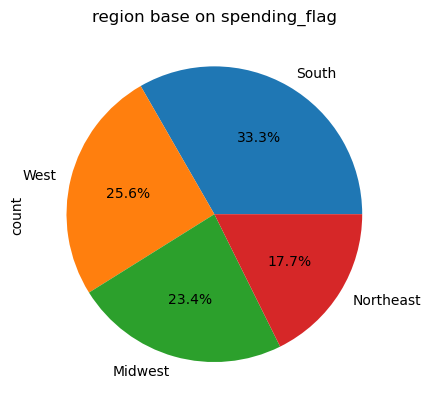

In [24]:
# pie chart - 'region base on spending_flage"
pie_region = insta_grocery['region'].value_counts().plot.pie(autopct='%1.1f%%', title='region base on spending_flag')

In [25]:
# Exporting pie chat of region base on spending
pie_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_region_.png'))

### Finding the Results of spending habits base by regions in the USA

#### - South region has the highest spending

#### - West region has the 2nd higest spending

#### - Midwest region has the 3rd highest spending

#### - Northwest region has the least amount of spending

## 4. Customer Flag

### " Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.Make sure you export this sample."

In [26]:
insta_grocery.groupby('region').agg({'order_number': ['mean', 'min', 'max']})

order_number           
                  mean  min   max
region                           
Midwest      16.925133  1.0  99.0
Northeast    17.215731  1.0  99.0
South        17.150969  1.0  99.0
West         17.279320  1.0  99.0

In [27]:
insta_grocery['max_order'] = insta_grocery.groupby(['user_id'])['order_number'].transform(np.max)

C:\Users\bhimc\AppData\Local\Temp\ipykernel_14152\3389028987.py:1: FutureWarning: The provided callable <function amax at 0x0000019995961A80> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  insta_grocery['max_order'] = insta_grocery.groupby(['user_id'])['order_number'].transform(np.max)


In [28]:
# Check the output of newly created column
insta_grocery[['user_id', 'max_order']].head()

,user_id,max_order
0,1,10.0
1,1,10.0
2,1,10.0
3,1,10.0
4,1,10.0


In [29]:
# create a column 'exclusion flag' with max_order
insta_grocery.loc[insta_grocery['max_order'] <5, 'exclusion_flag'] = 'low-activity customer'

In [30]:
# frequency of low-activity customers
insta_grocery['exclusion_flag'].value_counts()

exclusion_flag
nan                      30964564
low-activity customer     1440295
Name: count, dtype: int64

In [31]:
# create a new data frame 'insta_grocery' that exclude low-activity customers. 
insta_grocery = insta_grocery[insta_grocery['exclusion_flag'] != 'low-activity customer']

In [32]:
insta_grocery.shape

(30964564, 32)

In [33]:
insta_grocery['exclusion_flag'].value_counts()

exclusion_flag
nan    30964564
Name: count, dtype: int64

In [34]:
#export the new data frame excluding low-activity customers. 
insta_grocery.to_pickle(os.path.join(path, '02 Data\Prepared Data\insta_grocery.pkl'))

## 5. Create Customers profile and Department

### "Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)"

### - Creating a Customer's profile based on the following category:

### . Age_category - Young adult, Middle Age and senior citizen
### . Income_category - Low, Middle, high
### . marital_status - Married and Single

### - Create a Department flag  connected with customer profile

### . create a column of  "Age_category" 

In [18]:
# Create a agea-category column base one'age' less then 33 year = Young adult
insta_grocery.loc[insta_grocery['Age'] <33, 'Age_category'] = 'Young_adult'

In [19]:
# Age above 65 years = Senior Citizen
insta_grocery.loc[insta_grocery['Age'] >=65, 'Age_category'] = 'Senior_citizen'

In [20]:
# Age between 33- 65 = Middle age
insta_grocery.loc[(insta_grocery['Age']>=33) & (insta_grocery ['Age']<65), 'Age_category'] = 'Middle_age'

In [38]:
insta_grocery['Age_category'].value_counts()

Age_category
Middle_age        15483886
Senior_citizen     8195544
Young_adult        7285134
Name: count, dtype: int64

### .  Create a column of Income_category - Low, Middle, high

In [39]:
insta_grocery['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [21]:
# Create a 'Income_category' column base on income less than 67292 at 25% 
insta_grocery.loc[insta_grocery['income'] <67292, 'income_category'] ='Low_income'

In [22]:
insta_grocery.loc[(insta_grocery['income']>=67292) & (insta_grocery ['income']<1281020), 'income_category'] = 'Middle_income'

In [23]:
insta_grocery.loc[insta_grocery['income']>= 128102, 'income_category'] = 'High_income'

In [43]:
insta_grocery['income_category'].value_counts()

income_category
Middle_income    15482298
High_income       7741261
Low_income        7741005
Name: count, dtype: int64

In [44]:
insta_grocery['income_category'].shape

(30964564,)

## marital_status - Married and Single

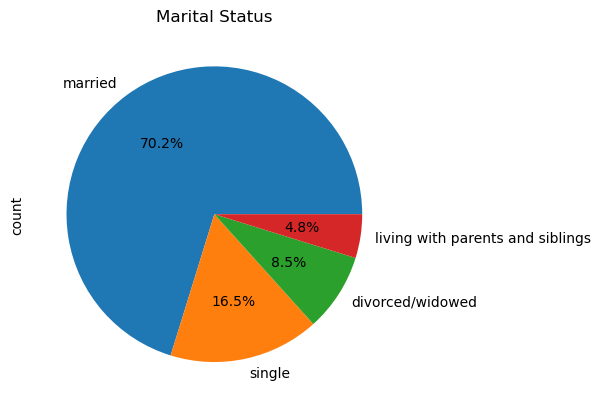

In [45]:
# pie chart - 'Share of marital status'
pie_marital_status = insta_grocery['marital_status'].value_counts().plot.pie(autopct='%1.1f%%', title='Marital Status')

In [46]:
# Exporting pie chat of family satus 
pie_marital_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_fam_status_.png'))

In [24]:
insta_grocery.loc[insta_grocery['marital_status']  == 'married', 'Family_category'] ='Married'

In [25]:
insta_grocery.loc[insta_grocery['Family_category']  == 'nan', 'Family_category'] ='Single'

In [26]:
insta_grocery['Family_category'].shape

(30964564,)

In [27]:
insta_grocery['Family_category'].value_counts()

Family_category
Married    21743711
Single      9220853
Name: count, dtype: int64

## - Order base on the week

In [51]:
insta_grocery['orders_day_of_week'].value_counts()

orders_day_of_week
0    5908610
1    5411686
6    4291304
5    4033729
2    4024706
3    3669535
4    3624994
Name: count, dtype: int64

In [52]:
# creating a data list of order_list_flag

orders_week_flag ={'Saturday':6107725,'Sunday':5572954,'Monday':4147880,'Tuesday':3785966,'Wednesday':3733707,'Thursday':4152834,'Friday':4428913}
week_category=list(orders_week_flag.keys())
week_count=list(orders_week_flag.values())
colors=['red','blue','pink','orange','yellow','rosybrown','green']

In [53]:
# size of the bar chart
plt.figure(figsize=(7,7))

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

Text(0, 0.5, 'No. of orders')

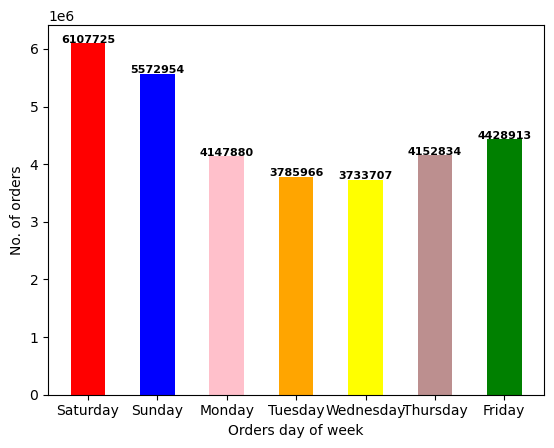

In [54]:
# Creat a bar chart of order day of week
bar_week=plt.bar(week_category,week_count,color=colors,width=0.5)

for i,v in enumerate(week_count):
    plt.text(i,v+3000, str(v), ha="center",weight="bold",size=8)
    # X_axis
    plt.xlabel('Orders day of week')
    # Y axis label
plt.ylabel('No. of orders')

## Most of the busiest days of the week are the weekends (Saturday and Sunday) and Friday.

### Recommedation : Focus mainly on the weekends

In [55]:
# Export the barchart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Figure size 640x480 with 0 Axes>

In [4]:
# due to the memmory issue Import the insta_grocery dataframe 
insta_grocery = pd.read_pickle(os.path.join(path, '02 Data\Prepared Data\insta_grocery.pkl'))

In [5]:
insta_grocery['Age'] = insta_grocery['Age'].astype('int32')

In [6]:
insta_grocery['income'] = insta_grocery['income'].astype('int32')

## Create a sample dataframe to show the correlation Between Age and Income

In [7]:
np.random.seed(4)
dev = np.random.rand(len(insta_grocery)) <= 0.7

In [8]:
np.random.rand(10)

array([0.40196087, 0.10262327, 0.49905822, 0.76022198, 0.8841328 ,
       0.70943956, 0.41872088, 0.11397028, 0.00622199, 0.26237651])

In [9]:
big = insta_grocery[dev]

In [10]:
small = insta_grocery[~dev]

In [37]:
len(insta_grocery)

30964564

In [38]:
len(big) + len(small)

30964564

In [11]:
df_2 = small[['Age','income']]

In [ ]:
line = sns.lineplot(data = df_2, x = 'income',y = 'Age')

C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [11]:
# create 'dependants_flag' column based on 'no_of_dependants' 

insta_grocery.loc[insta_grocery['number_of_dependants']==0,'dependants_flag']="No dependants"

In [13]:
# create 'dependants_flag' column based on 'no_of_dependants'

insta_grocery.loc[insta_grocery['number_of_dependants']>0,'dependants_flag']="With dependants"

In [14]:
insta_grocery['dependants_flag'].value_counts(dropna=False)

dependants_flag
With dependants    23224883
No dependants       7739681
Name: count, dtype: int64

## Create a 'Customer profile'  column base on the following category:
### Customer Profile = Age + Income + family status

#### The following 18 customer profiles would be created below:
    
1)Young adult-Low income- single
2)Young adult-Medium income-single
3)Young adult-High income-Single

4)Middle aged-Low income-Single
5)Middle aged-Medium income-Single
6)Middle aged-High income-Single

7)Senior citizen-Low income-Single
8)Senior citizen-Medium income-Single
9)Senior citizen-High income-Single

10)Young adult-Low income-Married
11)Young adult-Medium income-Married
12)Young adult-High income-Married

13)Middle aged-Low income-Marries
14)Middle aged-Medium income-Married
15)Middle aged-High income-Married

16)Senior citizen-Low income-Married
17)Senior citizen-Medium income-Married
18)Senior citizen-High income-Married


## Create a Cusromer profile with profile 1,2,3

In [80]:
insta_grocery.loc[(insta_grocery[ 'Age_category']=='Young_adult') & (insta_grocery['income_category']=='Low_income') & (insta_grocery['Family_category']=='Single'),'customer_profile']="Young_adult-Low_income-Single"

In [99]:
insta_grocery.loc[(insta_grocery[ 'Age_category']=='Young_adult') & (insta_grocery['income_category']=='Middle_income') & (insta_grocery['Family_category']=='Single'),'customer_profile']="Young_adult-Middle_income-Single"

In [82]:
insta_grocery.loc[(insta_grocery[ 'Age_category']=='Young_adult') & (insta_grocery['income_category']=='High_income') & (insta_grocery['Family_category']=='Single'),'customer_profile']="Young_adult-High_income-Single"

## Create a Customer profile with profile 4,5,6

In [83]:
insta_grocery.loc[(insta_grocery[ 'Age_category']=='Middle_age') & (insta_grocery['income_category']=='Low_income') & (insta_grocery['Family_category']=='Single'),'customer_profile']="Middle_age-Low_income-Single"

In [84]:
insta_grocery.loc[(insta_grocery[ 'Age_category']=='Middle_age') & (insta_grocery['income_category']=='Middle_income') & (insta_grocery['Family_category']=='Single'),'customer_profile']="Middle_age-Middle_income-Single"

In [85]:
insta_grocery.loc[(insta_grocery[ 'Age_category']=='Middle_age') & (insta_grocery['income_category']=='High_income') & (insta_grocery['Family_category']=='Single'),'customer_profile']="Middle_age-High_income-Single"

## Create a Customer profile with profile 7,8,9

In [86]:
insta_grocery.loc[(insta_grocery[ 'Age_category']=='Senior_citizen') & (insta_grocery['income_category']=='Low_income') & (insta_grocery['Family_category']=='Single'),'customer_profile']="Senior_citizen-Low_income-Single"

In [87]:
insta_grocery.loc[(insta_grocery[ 'Age_category']=='Senior_citizen') & (insta_grocery['income_category']=='Middle_income') & (insta_grocery['Family_category']=='Single'),'customer_profile']="Senior_citizen-Middle_income-Single"

In [88]:
insta_grocery.loc[(insta_grocery[ 'Age_category']=='Senior_citizen') & (insta_grocery['income_category']=='High_income') & (insta_grocery['Family_category']=='Single'),'customer_profile']="Senior_citizen-High_income-Single"

## Create a Customer profile with profile 10,11,12

In [89]:
insta_grocery.loc[(insta_grocery[ 'Age_category']=='Young_adult') & (insta_grocery['income_category']=='Low_income') & (insta_grocery['Family_category']=='Married'),'customer_profile']="Young_adult-Low_income-Married"

In [90]:
insta_grocery.loc[(insta_grocery[ 'Age_category']=='Young_adult') & (insta_grocery['income_category']=='Middle_income') & (insta_grocery['Family_category']=='Married'),'customer_profile']="Young_adult-Middle_income-Married"

In [91]:
insta_grocery.loc[(insta_grocery[ 'Age_category']=='Young_adult') & (insta_grocery['income_category']=='High_income') & (insta_grocery['Family_category']=='Married'),'customer_profile']="Young_adult-High_income-married"

## Create a Customer profile with profile 13,14,15

In [92]:
insta_grocery.loc[(insta_grocery[ 'Age_category']=='Middle_age') & (insta_grocery['income_category']=='Low_income') & (insta_grocery['Family_category']=='Married'),'customer_profile']="Middle_age-Low_income-Married"

In [93]:
insta_grocery.loc[(insta_grocery[ 'Age_category']=='Middle_age') & (insta_grocery['income_category']=='Middle_income') & (insta_grocery['Family_category']=='Married'),'customer_profile']="Middle_age-Middle_income-Married"

In [94]:
insta_grocery.loc[(insta_grocery[ 'Age_category']=='Middle_age') & (insta_grocery['income_category']=='High_income') & (insta_grocery['Family_category']=='Married'),'customer_profile']="Middle_age-High_income-Married"

## Create a Customer profile with profile 16,17,18

In [95]:
insta_grocery.loc[(insta_grocery[ 'Age_category']=='Senior_citizen') & (insta_grocery['income_category']=='Low_income') & (insta_grocery['Family_category']=='Married'),'customer_profile']="Senior_citizen-Low_income-Married"

In [96]:
insta_grocery.loc[(insta_grocery[ 'Age_category']=='Senior_citizen') & (insta_grocery['income_category']=='Middle_income') & (insta_grocery['Family_category']=='Married'),'customer_profile']="Senior_citizen-Middle_income-Married"

In [97]:
insta_grocery.loc[(insta_grocery[ 'Age_category']=='Senior_citizen') & (insta_grocery['income_category']=='High_income') & (insta_grocery['Family_category']=='Married'),'customer_profile']="Senior_citizen-High income-Married"

In [100]:
# frequency of customer_profile

insta_grocery['customer_profile'].value_counts(dropna=False)

customer_profile
Middle_age-Middle_income-Married        5737865
Middle_age-High_income-Married          3366928
Senior_citizen-Middle_income-Married    3003430
Middle_age-Low_income-Married           2478126
Senior_citizen-High income-Married      2366940
Young_adult-Middle_income-Married       2076619
Middle_age-Middle_income-Single         1915831
Young_adult-Low_income-Married          1865367
Young_adult-Middle_income-Single        1748087
Young_adult-Low_income-Single           1512981
Middle_age-High_income-Single           1154716
Senior_citizen-Middle_income-Single     1000466
Middle_age-Low_income-Single             830420
Senior_citizen-Low_income-Married        803216
Senior_citizen-High_income-Single        770597
Senior_citizen-Low_income-Single         250895
Young_adult-High_income-married           45220
Young_adult-High_income-Single            36860
Name: count, dtype: int64

In [101]:
# Export dataframe to Prepared Data foler as 'profilingdata.pkl' file

insta_grocery.to_pickle(os.path.join(path,'02 Data','Prepared Data','profiling_final.pkl'))